# Biodiversity in U.S. National Parks

![](bald-eagle-6481346_1280.jpg)
[Pixabay](https://pixabay.com/photos/bald-eagle-bird-raptor-bird-of-prey-6481346/)
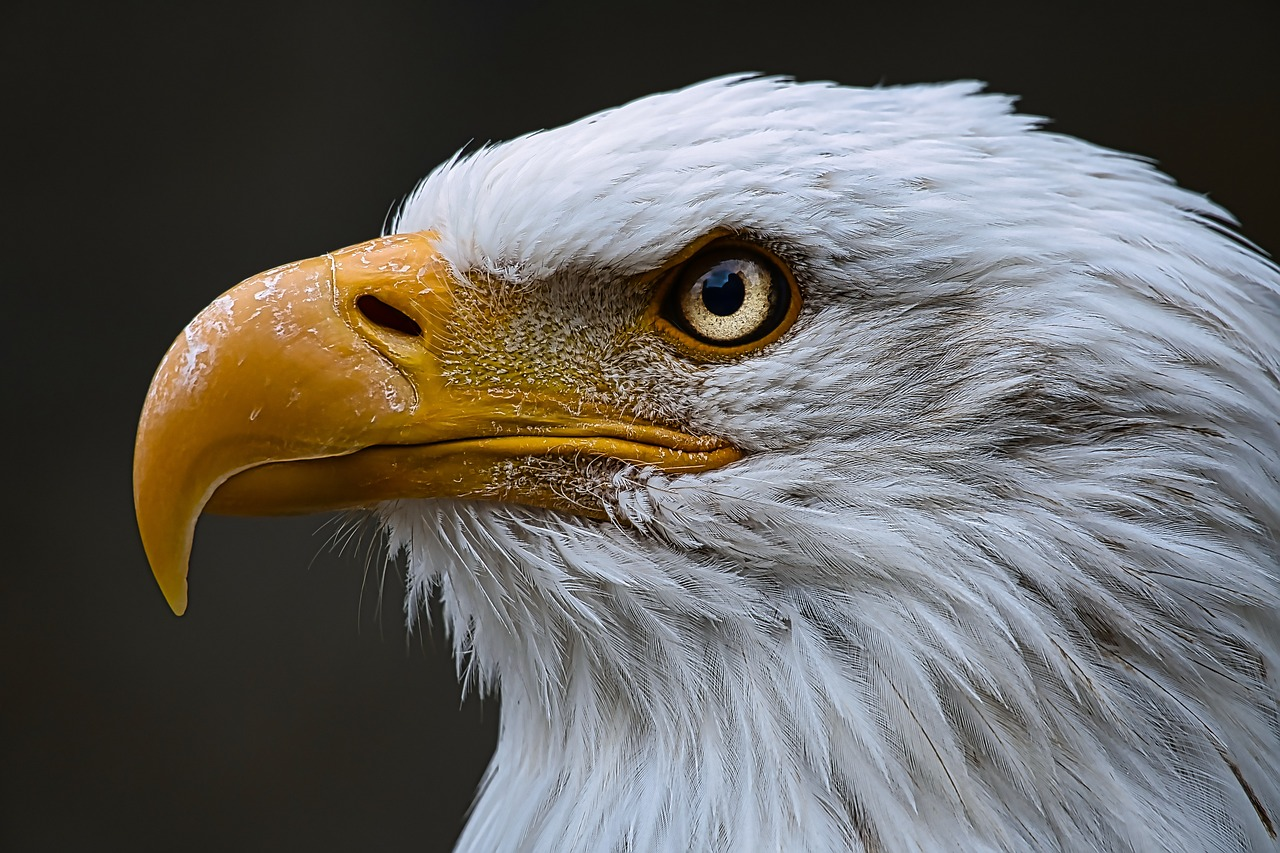

Importing the necessary modules

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading in the data

There are two .csv files to inspect

----

## Observations

The `observations.csv` contains data about different species and their conservation status

- `scientific_name` - the scientific name of each species
- `park_name` - National Park where species were found
- `observations` - the number of times each species was observed at park in the past 7 days


In [285]:
obs_data = pd.read_csv("observations.csv")
print(f"Columns: {obs_data.columns.tolist()}\n")

Columns: ['scientific_name', 'park_name', 'observations']



In [286]:
print(f"The first few entries in the Dataframe:\n\n{obs_data.head()}\n")
print(f"(Rows, Columns): {obs_data.shape}\n")
print(f"Data types: \n{obs_data.dtypes}")

The first few entries in the Dataframe:

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

(Rows, Columns): (23296, 3)

Data types: 
scientific_name    object
park_name          object
observations        int64
dtype: object


In [287]:
parks_list = obs_data.park_name.unique().tolist()
print(f"National Parks: \n{parks_list}\n")

sci_name = obs_data.scientific_name.unique()
print(f"Unique Species: \n{sci_name}\n")
sci_name_list_1 = sci_name.tolist()

print(f"We have {len(sci_name_list_1)} unique species")

National Parks: 
['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']

Unique Species: 
['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']

We have 5541 unique species


In [288]:
print(f"The number of unique values: \n{obs_data.nunique()}\n")

The number of unique values: 
scientific_name    5541
park_name             4
observations        304
dtype: int64



We have saved the list variables;

`parks_list`
which is a list of the National parks.
There are four, all in the United States of America

`num_species_list`
which is a list of unique species.

In [289]:
print(f"Number of observations: {obs_data.observations.sum()}")

Number of observations: 3314739


That's quite a few sightings in the last seven days!

----

## Species

The `species_info.csv` contains information on the different species in the National Parks along with their conservation status.

- `category` - class of animal
- `scientific_name` - the scientific name of each species
- `common_name` - the common names of each species
- `conservation_status` - each species’ current conservation status


In [290]:
species_data = pd.read_csv("species_info.csv")
print(f"Columns: {species_data.columns.tolist()}")

Columns: ['category', 'scientific_name', 'common_names', 'conservation_status']


In [291]:
print(species_data.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


We have a few interesting values.
Category seems to be genus.
we have scientific name -
#### need to see if the number of unique values correlates with the other dataframe
common names - there seem to be a number
conservation status -
#### need how many we have 'NaN' which I'm assuming means 'not endangered' - (could be bad assumption)

In [292]:
print(f"Shape of the data (Rows, Columns): {species_data.shape}\n")
print(f"Type of data:\n\n{species_data.dtypes}\n")
print(f"The number of unique values:\n\n{species_data.nunique()}")

Shape of the data (Rows, Columns): (5824, 4)

Type of data:

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

The number of unique values:

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


It's useful to have a few of the unique column values saved as lists to better see what we're dealing with

In [293]:
sci_name_list_2 = species_data.scientific_name.unique()
print(f"Unique Species (Scientific Name): {len(sci_name_list_2)}\n")

com_name_list = species_data.common_names.unique()
print(f"Unique Species (Common Name): {len(com_name_list)}")

Unique Species (Scientific Name): 5541

Unique Species (Common Name): 5504


I would expect the scientific name/common name to be the same length. There's a discrepancy
Maybe some species haven't been given a 'common name'!

## Explore the `species_info` data

#### Category

Find the number of `category` that are represented in the data.

In [294]:
category_list = species_data.category.unique()
print(f"{len(category_list)} Categories:\n{category_list}\n")
species_data.groupby('category').size()

7 Categories:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']



category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

### Conservation Status

Explore the `conservation_status` column

In [295]:
print(f"There are {species_data.conservation_status.nunique()} categories:\n\n{species_data.conservation_status.unique()}")

There are 4 categories:

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Useful to find out how many are NaN

In [296]:
print(f"NaN value count: {species_data.conservation_status.isna().sum()}\n")
print(species_data.groupby("conservation_status").size())

NaN value count: 5633

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


----

# Analysis



The column `conservation_status` has values;
&nbsp;
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
&nbsp;
I will change the `NaN` value to 'Least Concern' as per the [International Union for Conservation of Nature](https://en.wikipedia.org/wiki/IUCN_Red_List) classification system

In [297]:
species_data.fillna('Least Concern', inplace=True)
species_data.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Least Concern         5633
Species of Concern     161
Threatened              10
dtype: int64

In [298]:
conservation_cat = species_data[species_data.conservation_status != 'Least Concern']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
print(f"Categories nested in conservation_status' column:\n\n{conservation_cat}")

Categories nested in conservation_status' column:

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Birds have the greatest number of 'Species of Concern'

In [299]:
cons_status_list = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
print(cons_status_list)

['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']


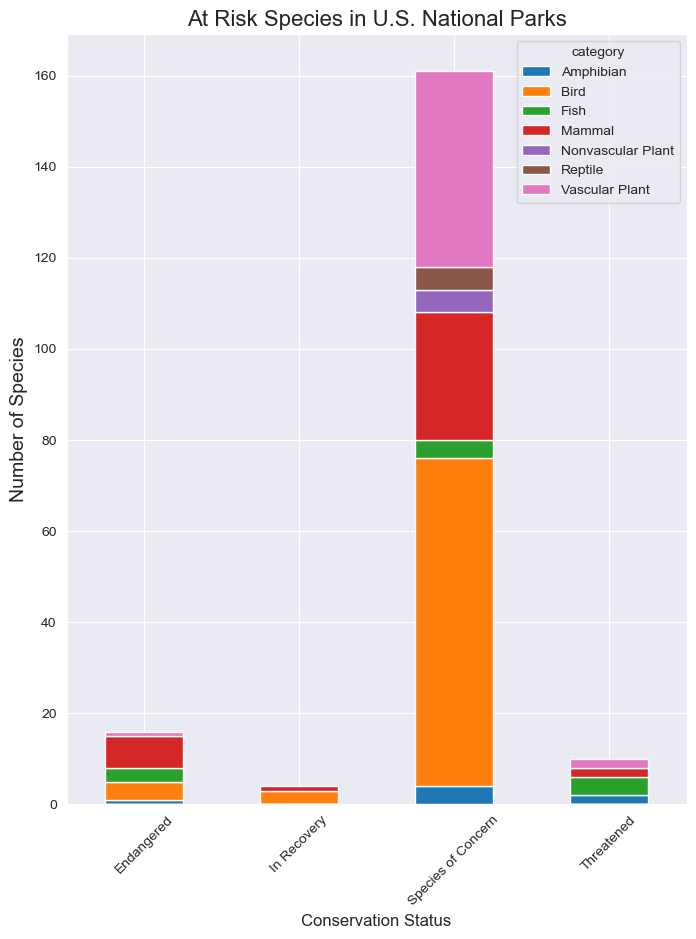

<Figure size 640x480 with 0 Axes>

In [300]:
ax = conservation_cat.plot(kind='bar', figsize=(8,10),
                           stacked=True)
ax.set_xlabel("Conservation Status", fontsize=12)
ax.set_ylabel("Number of Species", fontsize=14)
ax.set_xticks(range(len(cons_status_list)))
ax.set_xticklabels(cons_status_list)
plt.xticks(rotation=45, fontsize=10)
plt.title("At Risk Species in U.S. National Parks", fontsize=16)
plt.show()
plt.clf()

### I will plot another visualisation removing the 'Species of Concern' category

In [301]:
conservation_cat_two = species_data[(species_data.conservation_status != 'Least Concern')
                    & (species_data.conservation_status != 'Species of Concern')]\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
print(conservation_cat_two.head())

category             Amphibian  Bird  Fish  Mammal  Vascular Plant
conservation_status                                               
Endangered                 1.0   4.0   3.0     7.0             1.0
In Recovery                NaN   3.0   NaN     1.0             NaN
Threatened                 2.0   NaN   4.0     2.0             2.0


In [302]:
cons_status_list_two = ['Endangered', 'In Recovery', 'Threatened']

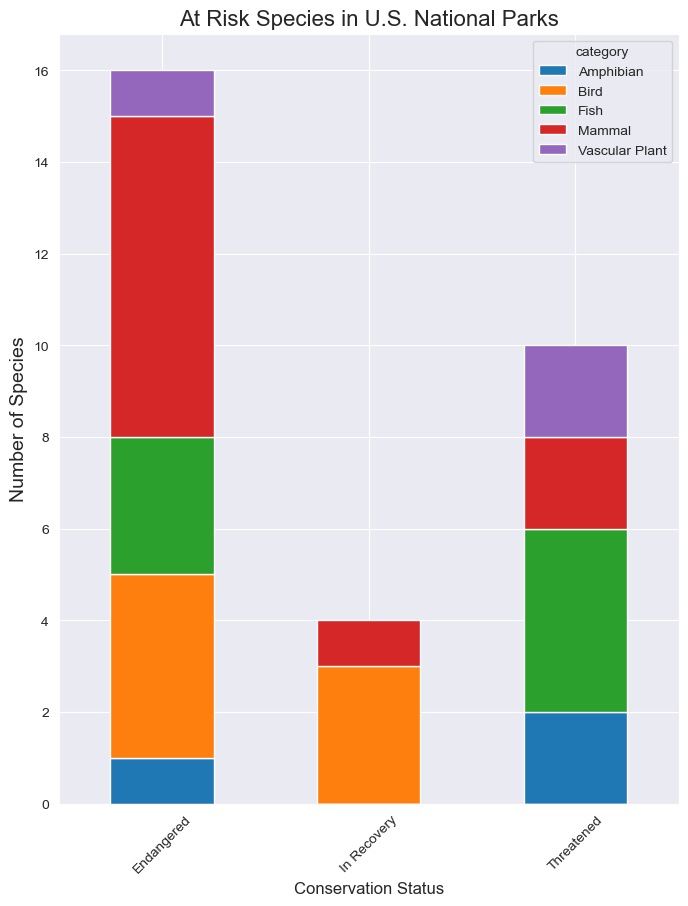

<Figure size 640x480 with 0 Axes>

In [303]:
ax = conservation_cat_two.plot(kind='bar', figsize=(8,10),
                           stacked=True)
ax.set_xlabel("Conservation Status", fontsize=12)
ax.set_ylabel("Number of Species", fontsize=14)
ax.set_xticks(range(len(cons_status_list_two)))
ax.set_xticklabels(cons_status_list_two)
plt.xticks(rotation=45, fontsize=10)
plt.title("At Risk Species in U.S. National Parks", fontsize=16)
plt.show()
plt.clf()

It's clear 'Birds' are most at risk across the board in U.S. National Parks.
&nbsp;
- A lot of this visualisation can be cleared up.
Especially with the list indexing code. Some is quite inefficient

### So are certain types of species more likely to be endangered?

I will create a new column, `is_protected` to include any species with a value other than `Least Concern`.

In [304]:
species_data['is_protected'] = species_data.conservation_status != 'Least Concern'

In [305]:
category_counts = species_data.groupby(['category', 'is_protected'])\
                            .scientific_name.nunique()\
                            .reset_index()\
                            .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                            .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Add a column, `percent_protected` that shows the rate of protected species

In [306]:
percentage = round(category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100, 2)

category_counts['percent_protected'] = percentage
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


----

## To do
-  Create visual of category with hue protected/non-protected

----

----

# Species Exploration

## I'm most interested in exploring what I'd consider to be apex predators. They are normally one of the best indicators of biodiversity
----

### Wolves

I fill first explore the genus [Canis](https://en.wikipedia.org/wiki/Canis) which includes;
wolves, dogs, coyotes and jackals.

In [307]:
species_data['is_canis'] = species_data.scientific_name.str.contains(r"\bCanis\b", regex=True)
species_data[species_data.is_canis]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis
7,Mammal,Canis latrans,Coyote,Species of Concern,True,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,True


They are all protected.

However, there are not many species represented.
There's an element of ambiguity with the common name taking different values
`Gray Wolf` is represented three times with different conservation status...

Data cleaning needs to happen before exploring another Genus

----

### Big Cats

I will first explore any hits under `common_name` 'cat' or 'lion'

In [308]:
species_data['cat'] = species_data.common_names.str.contains(r"\bCat\b", regex=True)
species_data[species_data.cat]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,True
858,Vascular Plant,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Least Concern,False,False,True
3577,Vascular Plant,Cryptantha torreyana,"Torrey's Cat's-Eye, Torrey's Cryptantha",Least Concern,False,False,True
4062,Vascular Plant,Picea glauca,"Black Hills Spruce, Canadian Spruce, Cat Spruc...",Least Concern,False,False,True
4798,Vascular Plant,Hypochaeris glabra,"Smooth Cat's Ear, Smooth Catsear",Least Concern,False,False,True
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Least Concern,False,False,True


Hit one cat and five plants...

In [309]:
species_data['lion'] = species_data.common_names.str.contains(r"\bLion\b", regex=True)
species_data[species_data.lion]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat,lion
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,True
16,Mammal,Puma concolor,Panther (Mountain Lion),Least Concern,False,False,False,True
897,Vascular Plant,Prenanthes serpentaria,"Lion's-Foot, Rattlesnakeroot",Least Concern,False,False,False,True
898,Vascular Plant,Prenanthes trifoliolata,"Lion's Foot, Three-Leaved Rattlesnake-Root",Least Concern,False,False,False,True
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern,False,False,False,True
4451,Mammal,Puma concolor,Mountain Lion,Least Concern,False,False,False,True


More ambiguity searching for `lion`
`Puma concolor` has been referred at as "Panther, Cougar, Mountain Lion, Puma"
`Felis concolor` has also been referred to as a "Mountain Lion"

Let's see if there are any more hits for the genus [Felis](https://en.wikipedia.org/wiki/Felis)

In [310]:
species_data['is_felis'] = species_data.scientific_name.str.contains(r"\bFelis\b", regex=True)
species_data[species_data.is_felis]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat,lion,is_felis
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,True,True
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,True,False,True


----
# Milestone

&nbsp;
The ambiguity in the naming convention above suggests to me that members of the public are 'self-reporting' observations.
Maybe they do not know what they have seen at all! - This is a (big) assumption

----

Will remove the newly created columns to 'clean' `species_data`

In [311]:
species_data.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat,lion,is_felis
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,False,False,False,False


In [312]:
species_data.drop(columns=['is_canis', 'lion', 'cat', 'is_felis'], axis=1, inplace=True)
species_data.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False


## We are back to where we started

----

## Birds of Prey

Need to isolate the bird species that are protected. That is, $\neq$ `Least Concern`

In [313]:
protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status != 'Least Concern')])
print(protected_birds.head())
print(f"\nThere are {len(protected_birds)} protected bird species in 'observations.csv'")

   category     scientific_name         common_names conservation_status  \
91     Bird  Accipiter cooperii        Cooper's Hawk  Species of Concern   
93     Bird  Accipiter striatus   Sharp-Shinned Hawk  Species of Concern   
94     Bird   Aquila chrysaetos         Golden Eagle  Species of Concern   
96     Bird      Buteo lineatus  Red-Shouldered Hawk  Species of Concern   
98     Bird      Circus cyaneus     Northern Harrier  Species of Concern   

    is_protected  
91          True  
93          True  
94          True  
96          True  
98          True  

There are 79 protected bird species in 'observations.csv'


We now need to isolate birds of prey.

Need to do research and create a list of the common names of American birds of prey.
For example, [Eagle, Hawk, etc...](https://en.wikipedia.org/wiki/Bird_of_prey)

#### There is a good chance I may miss entries with this method

In [314]:
birds_of_prey = ["Eagle", "Hawk", "Falcon", "Buzzard", "Harrier", "Kite", "Owl", "Osprey", "Vulture", "Condor"]

### Need to find a way of filling with `Not Bird of Prey` if not a bird of prey!     (27/01/2023)

I did find a way, I think it's quite convoluted, (28/01/2013)

- Create a new column `bird_of_prey` in the DataFrame `species_data`
- Search `common_names` for any matches to the above list `birds_of_prey`
- This adds value to the `bird_of_prey` column
- The value is a list either empty [] or in the form [`value`, `value`]
- The next line replaces the [`value`] with a string followed by a full-stop if more than one [`value`].
- The problem is later in this analysis, we need to deal with repeated values. There is only one, specifically, `Kite. Kite`

In [315]:
species_data['bird_of_prey'] = species_data.common_names.str.findall('(?i)({0})'.format('|'.join(birds_of_prey)))
# converts the list in 'bird_of_prey' to a string
species_data['bird_of_prey'] = species_data['bird_of_prey'].apply('. '.join)

#### I then isolate protected birds from `species_data`

In [316]:
protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status != 'Least Concern')])
print(protected_birds.head())
print(protected_birds.shape)

   category     scientific_name         common_names conservation_status  \
91     Bird  Accipiter cooperii        Cooper's Hawk  Species of Concern   
93     Bird  Accipiter striatus   Sharp-Shinned Hawk  Species of Concern   
94     Bird   Aquila chrysaetos         Golden Eagle  Species of Concern   
96     Bird      Buteo lineatus  Red-Shouldered Hawk  Species of Concern   
98     Bird      Circus cyaneus     Northern Harrier  Species of Concern   

    is_protected bird_of_prey  
91          True         Hawk  
93          True         Hawk  
94          True        Eagle  
96          True         Hawk  
98          True      Harrier  
(79, 6)


I then separate `protected_birds` into another DataFrame `protected_birds_prey` based on whether the `bird_of_prey` column contains an empty string

In [317]:
protected_birds_prey = protected_birds[protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
protected_birds_prey_list = protected_birds_prey.common_names.tolist()
print(f"We have {len(protected_birds_prey_list)} protected birds of prey\
                \n\nWith Common Names:\n\n{protected_birds_prey_list}")
print(protected_birds_prey.shape)

We have 18 protected birds of prey                

With Common Names:

["Cooper's Hawk", 'Sharp-Shinned Hawk', 'Golden Eagle', 'Red-Shouldered Hawk', 'Northern Harrier', 'American Swallow-Tailed Kite, Swallow-Tailed Kite', 'Bald Eagle', 'Turkey Vulture', 'Osprey', 'Peregrine Falcon', 'Short-Eared Owl', 'Long-Eared Owl', 'Rough-Legged Hawk', 'Osprey, Western Osprey', 'Prairie Falcon', 'American Peregrine Falcon', 'White-Tailed Kite', 'California Condor']
(18, 6)




----
# Dataframe Merge

`protected_birds` will be merged with `obs_data` to create a Dataframe `protected_birds_obs` with observations of protected birds across the four national parks

Which after inspection,

- Need to delete repeated entries [Osprey, Western Osprey]
- Replace `'American Swallow-Tailed Kite, Swallow-Tailed Kite` with `Swallow-Tailed Kite` in the `common_names` column
- Replace `Kite. Kite` with `Kite` in the `bird_of_prey` column

----

## Dataframe `protected_birds_obs` containing all protected birds

In [318]:
protected_birds_obs = obs_data.merge(protected_birds[protected_birds.is_protected])

In [319]:
osprey_obs = (protected_birds_obs[(protected_birds_obs.common_names == 'Osprey')
             | (protected_birds_obs.common_names == 'Osprey, Western Osprey')])
print(osprey_obs[4:11])

      scientific_name                  park_name  observations category  \
8   Pandion haliaetus        Bryce National Park            72     Bird   
9   Pandion haliaetus        Bryce National Park            72     Bird   
10  Pandion haliaetus  Yellowstone National Park           223     Bird   
11  Pandion haliaetus  Yellowstone National Park           223     Bird   
12  Pandion haliaetus     Yosemite National Park           148     Bird   
13  Pandion haliaetus     Yosemite National Park           148     Bird   
14  Pandion haliaetus  Yellowstone National Park           243     Bird   

              common_names conservation_status  is_protected    bird_of_prey  
8                   Osprey  Species of Concern          True          Osprey  
9   Osprey, Western Osprey  Species of Concern          True  Osprey. Osprey  
10                  Osprey  Species of Concern          True          Osprey  
11  Osprey, Western Osprey  Species of Concern          True  Osprey. Osprey  
12  

We can see that `Osprey` and `Osprey, Western Osprey` observation values are exactly repeated

- we also have two different Osprey `observation`s for each National Park

In [320]:
print(f"we have {osprey_obs.shape[0]} rows. We would expect {int(osprey_obs.shape[0] / 2)}")

we have 16 rows. We would expect 8


That after deletion should leave us with 4. Nevertheless;

- Delete repeated entries [Osprey, Western Osprey]
- Replace `'American Swallow-Tailed Kite, Swallow-Tailed Kite` with `Swallow-Tailed Kite` in the `common_names` column
- Replace `Kite. Kite` with `Kite` in the `bird_of_prey` column

In [321]:
protected_birds_obs.drop(protected_birds_obs.loc[protected_birds_obs['common_names']=='Osprey, Western Osprey'].index, inplace=True)
protected_birds_obs['common_names'].replace({'American Swallow-Tailed Kite, Swallow-Tailed Kite':'Swallow-Tailed Kite'},inplace=True)
protected_birds_obs['bird_of_prey'].replace({'Kite. Kite':'Kite'},inplace=True)

----


## Separate Dataframe `protected_birds_prey_obs` containing only birds of prey

Again using a lambda function

In [322]:
protected_birds_prey_obs = protected_birds_obs[protected_birds_obs['bird_of_prey'].map(lambda x: len(x)) > 0]

## Total number of protected bird observations across the four National Parks

In [323]:
protected_birds_obs['is_bird_of_prey'] = protected_birds_obs.bird_of_prey != ''

In [324]:
bird_obs_by_park = protected_birds_obs.groupby(['park_name', 'is_bird_of_prey']).observations.sum().reset_index()
print(bird_obs_by_park)

                             park_name  is_bird_of_prey  observations
0                  Bryce National Park            False          5982
1                  Bryce National Park             True          1472
2  Great Smoky Mountains National Park            False          4157
3  Great Smoky Mountains National Park             True          1002
4            Yellowstone National Park            False         14282
5            Yellowstone National Park             True          3778
6               Yosemite National Park            False          8785
7               Yosemite National Park             True          2226


## Visualisation of proportion of bird of prey observations across the four National Parks

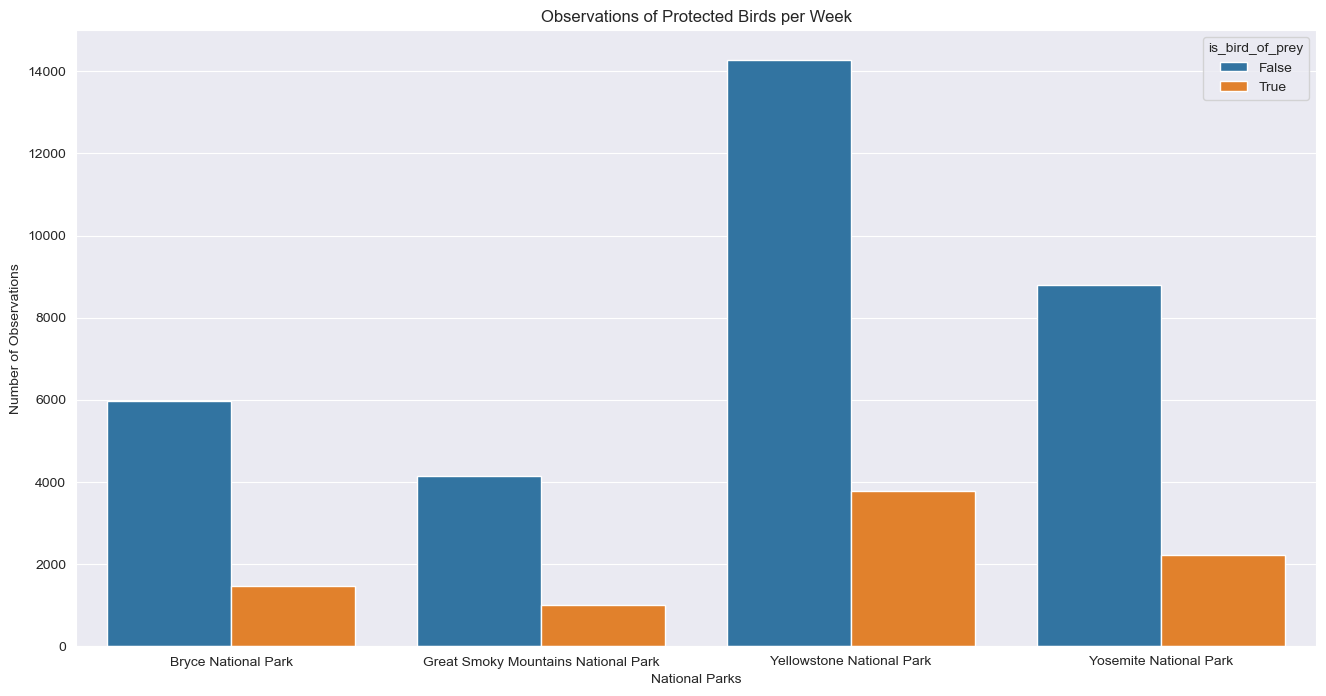

In [325]:
plt.figure(figsize=(16, 8))
data = bird_obs_by_park
sns.barplot(x=data.park_name, y=data.observations , hue=data.is_bird_of_prey)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Protected Birds per Week')
plt.show()

# From the above visual, bird of prey sightings make up roughly a quarter of all protected bird sightings across the National Parks

----

# I will create some visualisations of species of bird of prey by recorded National Park Observation

which have already been seperated into a new Dataframe; `protected_birds_prey_obs`

In [326]:
print(protected_birds_prey_obs.head())
print(protected_birds_prey_obs.shape)

      scientific_name                            park_name  observations  \
0  Accipiter cooperii                  Bryce National Park            95   
1  Accipiter cooperii               Yosemite National Park           138   
2  Accipiter cooperii            Yellowstone National Park           245   
3  Accipiter cooperii  Great Smoky Mountains National Park            65   
4   Pandion haliaetus               Yosemite National Park           134   

  category   common_names conservation_status  is_protected bird_of_prey  
0     Bird  Cooper's Hawk  Species of Concern          True         Hawk  
1     Bird  Cooper's Hawk  Species of Concern          True         Hawk  
2     Bird  Cooper's Hawk  Species of Concern          True         Hawk  
3     Bird  Cooper's Hawk  Species of Concern          True         Hawk  
4     Bird         Osprey  Species of Concern          True       Osprey  
(72, 8)


----
### Next is to assign a unique colour to each 'type' of `bird of prey` variable

In [327]:
print(f"We have {len(birds_of_prey)} birds of prey {birds_of_prey}")

We have 10 birds of prey ['Eagle', 'Hawk', 'Falcon', 'Buzzard', 'Harrier', 'Kite', 'Owl', 'Osprey', 'Vulture', 'Condor']


In [328]:
bird_of_prey_colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']

The above list was compiled from the html codes from the qualitative colour palette 'Set-3' from [Color Brewer](https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=10)

Now to create a {key: value} dictionary of these colours.

In [329]:
prey_colour = {}
for bird in birds_of_prey:
    for colour in bird_of_prey_colours:
        prey_colour[bird] = colour
        bird_of_prey_colours.remove(colour)
        break

print(f"The resulting dictionary is: \n{prey_colour}")

The resulting dictionary is: 
{'Eagle': '#8dd3c7', 'Hawk': '#ffffb3', 'Falcon': '#bebada', 'Buzzard': '#fb8072', 'Harrier': '#80b1d3', 'Kite': '#fdb462', 'Owl': '#b3de69', 'Osprey': '#fccde5', 'Vulture': '#d9d9d9', 'Condor': '#bc80bd'}


This dictionary can assign {key: value} pairs to the plots and give a unique colour to each 'type' of bird of prey

----
### Now to amalgamate the `Osprey` observations

The problem is the `Osprey` category has repeated observations
- This could be a genuine error, or it could be I needed to resign the label `Western Osprey` to one group of sightings
- I will sum the two sets of observation values
- After summation, we would expect 68 rows instead of 72

In [330]:
protected_birds_prey_obs_sorted = protected_birds_prey_obs.groupby(['park_name', 'bird_of_prey', 'common_names', 'conservation_status'])['observations'].sum().reset_index()
print(protected_birds_prey_obs_sorted.shape)

(68, 5)


----
### Apply unique colours by `bird_of_prey`

using a lambda function and the `prey_colour` dictionary

In [331]:
c = protected_birds_prey_obs_sorted['bird_of_prey'].apply(lambda x: prey_colour[x])

----
### Below is an iteration that creates individual `DataFrames` of observations for each park.

In [339]:
# Loop through the parks
d = {}
for park in parks_list:
    d[park] = pd.DataFrame(protected_birds_prey_obs_sorted[protected_birds_prey_obs_sorted['park_name'] == park].reset_index())
    # Create a new data frame for each park
    # This is a useful variable for creating the visualisations.

# Printing to test
for i in range(0, len(parks_list)):
    print(f"\n{parks_list[i]}:\nShape: {d[parks_list[i]].shape}")
    print(f"{d[parks_list[i]].head()}")


Great Smoky Mountains National Park:
Shape: (17, 6)
   index                            park_name bird_of_prey  \
0     17  Great Smoky Mountains National Park       Condor   
1     18  Great Smoky Mountains National Park        Eagle   
2     19  Great Smoky Mountains National Park        Eagle   
3     20  Great Smoky Mountains National Park       Falcon   
4     21  Great Smoky Mountains National Park       Falcon   

                common_names conservation_status  observations  
0          California Condor          Endangered            15  
1                 Bald Eagle         In Recovery            72  
2               Golden Eagle  Species of Concern            65  
3  American Peregrine Falcon         In Recovery            70  
4           Peregrine Falcon  Species of Concern            38  

Yosemite National Park:
Shape: (17, 6)
   index               park_name bird_of_prey               common_names  \
0     51  Yosemite National Park       Condor          California Co

In [333]:
protected_birds_prey_list = protected_birds_prey_obs_sorted.common_names.unique().tolist()
print(f"We have {len(protected_birds_prey_list)} protected birds of prey\
                \n\nWith Common Names:\n\n{protected_birds_prey_list}")

We have 17 protected birds of prey                

With Common Names:

['California Condor', 'Bald Eagle', 'Golden Eagle', 'American Peregrine Falcon', 'Peregrine Falcon', 'Prairie Falcon', 'Northern Harrier', "Cooper's Hawk", 'Red-Shouldered Hawk', 'Rough-Legged Hawk', 'Sharp-Shinned Hawk', 'Swallow-Tailed Kite', 'White-Tailed Kite', 'Osprey', 'Long-Eared Owl', 'Short-Eared Owl', 'Turkey Vulture']


# Visualisation of protected bird of prey sightings by National Park

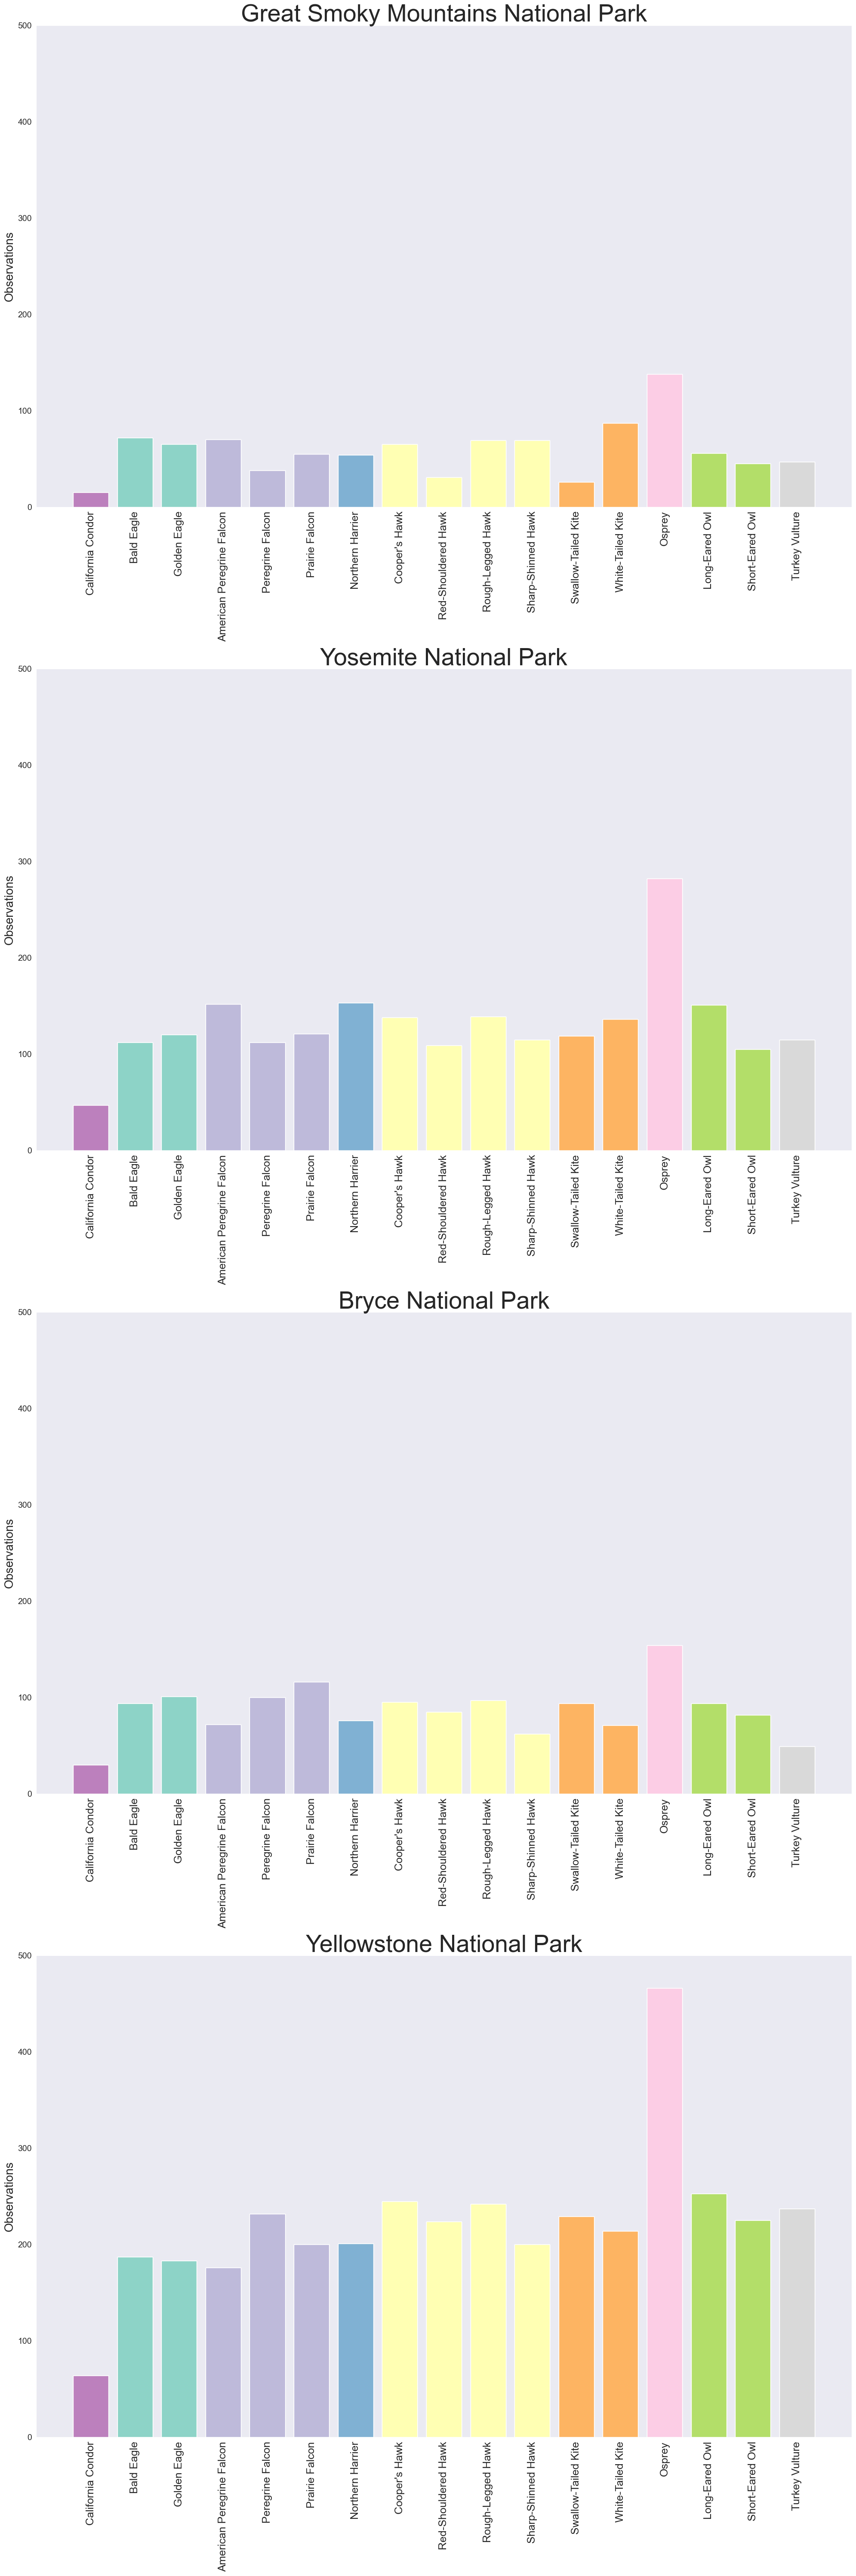

In [334]:
fig = plt.figure(figsize=(20,60))
for i in range(0,len(parks_list)):
    nat_park = parks_list[i]
    for park in parks_list:
        d[park] = pd.DataFrame(protected_birds_prey_obs_sorted[protected_birds_prey_obs_sorted['park_name'] == nat_park])
        ax = plt.subplot(4,1,(i+1))
        plt.bar(x=d[park].common_names, height=d[park].observations, color=c)
        plt.xticks(rotation=90, fontsize=18)
        plt.yticks(fontsize=14)
        plt.title(nat_park, fontsize=40)
        plt.ylim(0,500)
        plt.grid(False)
        plt.ylabel("Observations", fontsize=20)
plt.tight_layout()
plt.show()

----

# Need to sort:

- plot a colour map with label `bird_of_prey`

----

### As we saw when we compared protected species across the board. There are no threatened bird species

### `Osprey` is the most observed bird of prey across the national parks. However, this category could fall into two groups;
`Osprey` & `Western Osprey`.
&nbsp;
As such, we may have made an erroneous assumption!

In [335]:
cons_status = d[parks_list[0]]['conservation_status'].unique().tolist()
print(cons_status)

['Endangered', 'In Recovery', 'Species of Concern']


I will populate three lists with the corresponding `common_names`

In [336]:
endangered = []
in_recovery = []
species_of_concern = []

data = d[parks_list[0]]

for index, row in data.iterrows():
    if row['conservation_status'] == 'Endangered':
        endangered.append(row['common_names'])
    elif row['conservation_status'] == 'In Recovery':
        in_recovery.append(row['common_names'])
    else:
        species_of_concern.append(row['common_names'])

In [337]:
print(f"There is/are {len(endangered)} endangered bird of prey species: \n\n{endangered}")

There is/are 1 endangered bird of prey species: 

['California Condor']


#### As we can see from the above visualisations, 'California Condor' is the least observed bird of prey in every National Park

- which make sense as it is the only endangered bird of prey represented in the data set

In [338]:
print(f"There is/are {len(in_recovery)} bird of prey species in recovery: \n\n{in_recovery}")

There is/are 2 bird of prey species in recovery: 

['Bald Eagle', 'American Peregrine Falcon']


#### 'Bald Eagle' observations are not significantly different from 'Golden Eagle' observations

#### The remaining species are all `Species of Concern`

----
### Total Number of bird of prey observations across the four National Parks

In [159]:
bird_prey_obs = protected_birds_prey_obs_sorted.groupby('park_name').observations.sum().reset_index()
print(bird_prey_obs)

                             park_name  observations
0                  Bryce National Park          1472
1  Great Smoky Mountains National Park          1002
2            Yellowstone National Park          3778
3               Yosemite National Park          2226


In [160]:
total = bird_prey_obs.observations.sum()
print(f"Total number of bird of prey observations: {total}")

Total number of bird of prey observations: 8478


In [162]:
print(f"Total number of observations, every category, every park: {obs_data.observations.sum()}")

Total number of observations, every category, every park: 3314739


In [161]:
percentage_bird_prey = round((bird_prey_obs.observations.sum() / obs_data.observations.sum()) * 100, 2)
print(f"Of the observations across all National Parks, {percentage_bird_prey} % were bird of prey observations")

Of the observations across all National Parks, 0.26 % were bird of prey observations




----